# Heart Failure Prediction


## Data Exploration

In [3]:
#importing required libraries
import pandas as pd

In [4]:
#Loading the dataset
df = pd.read_csv('heart.csv')
print('Dataset has been loaded')

Dataset has been loaded


In [5]:
#Displaying the top 5 results of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
#Getting to know Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
print('Statictics of the dataframe')
df.describe()

Statictics of the dataframe


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Checking for any missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
#Looking for zeros in Cholesterol,RestingBP and FastingBS.
print("Zeros in Cholesterol:",(df['Cholesterol'] == 0).sum())
print("Zeroes in RestingBP:", (df['RestingBP']==0).sum())
print("Zeroes in RestingBP:", (df['FastingBS']==0).sum())

Zeros in Cholesterol: 172
Zeroes in RestingBP: 1
Zeroes in RestingBP: 704


In [10]:
print("Count of HeartDisease (0 = No, 1 = Yes):")
df['HeartDisease'].value_counts()

Count of HeartDisease (0 = No, 1 = Yes):


HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
#Average Age by HeartDisease
df.groupby('HeartDisease')['Age'].mean()

HeartDisease
0    50.551220
1    55.899606
Name: Age, dtype: float64

## Visualization Dashboard

In [23]:
#importing required libraries
import matplotlib.pyplot as plt
import plotly.express as px

### Bar Chart

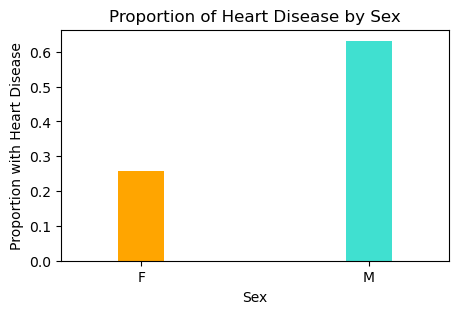

In [59]:
#Bar Chart of Heart Disease by Sex
plt.figure(figsize=(5,3))
df.groupby('Sex')['HeartDisease'].mean().plot(kind='bar',color=['orange','turquoise'],width=0.2)
plt.title('Proportion of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion with Heart Disease')
plt.xticks(rotation=0)
plt.show()


### Histogram

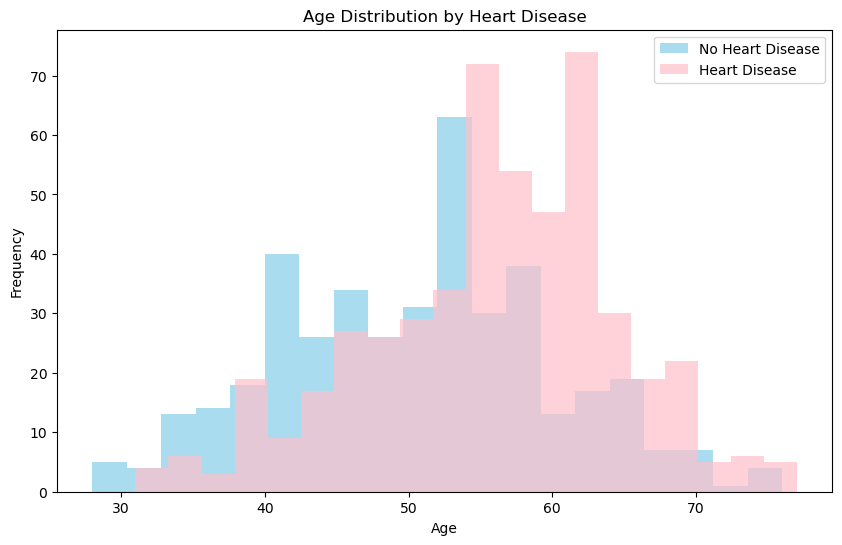

In [94]:
#Histogram of AGE by Heart Disease
plt.figure(figsize=(10,6))
plt.hist(df[df['HeartDisease']==0]['Age'], bins=20,alpha=0.7,label = 'No Heart Disease',color='skyblue')
plt.hist(df[df['HeartDisease']==1]['Age'], bins=20,alpha=0.7,label = 'Heart Disease',color='pink')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Scatter PLot

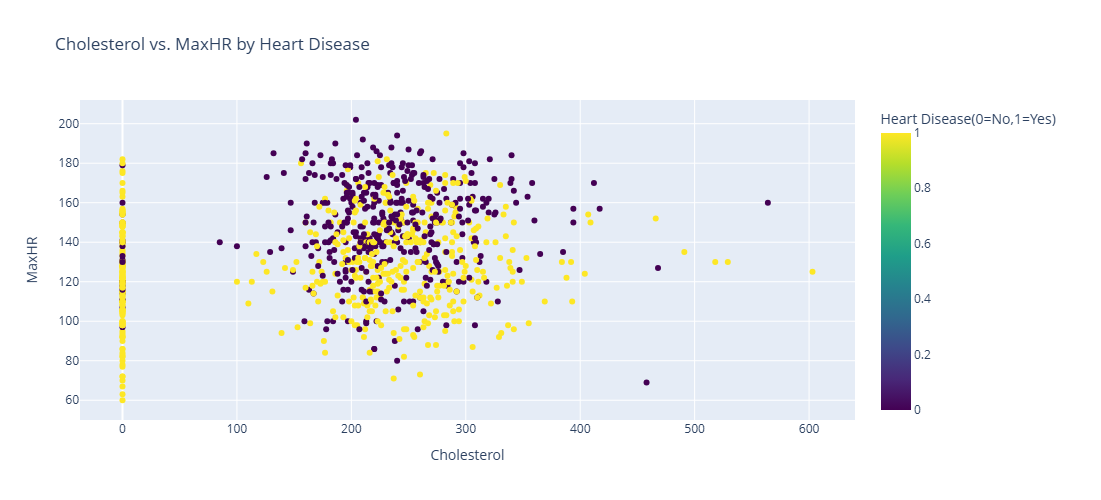

In [119]:
#Scatter PLot of Cholesterol vs MAXHR
fig = px.scatter(df, x='Cholesterol',y='MaxHR',color='HeartDisease',hover_data=['Age','Sex'],title='Cholesterol vs. MaxHR by Heart Disease',labels={'HeartDisease':'Heart Disease(0=No,1=Yes)'},color_continuous_scale='Viridis')
fig.update_layout(width=800, height = 500)
fig.show()

### Box Plot

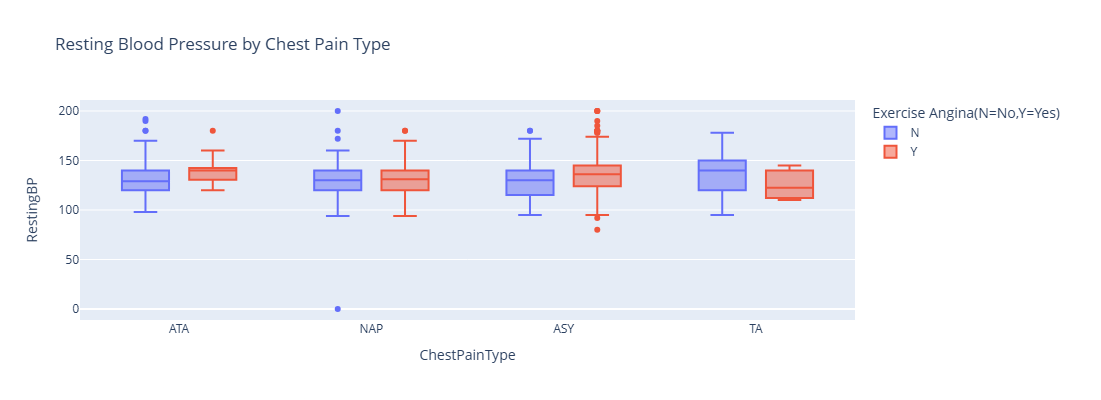

In [134]:
# box plot of RestingBP by ChestPainType
fig = px.box(df,x='ChestPainType',y='RestingBP',color='ExerciseAngina',title='Resting Blood Pressure by Chest Pain Type',labels={'ExerciseAngina':'Exercise Angina(N=No,Y=Yes)'})
fig.update_layout(width=700,height=400)
fig.show()

### Pie Chart

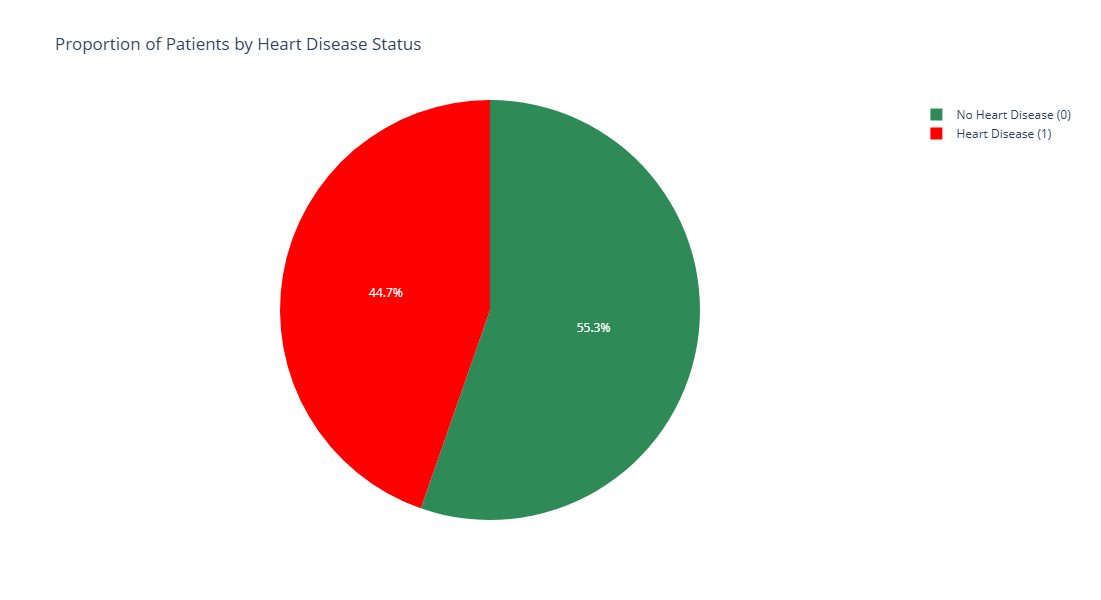

In [155]:
#Pie Chart for Heart Disease Breakdown
count = df['HeartDisease'].value_counts()
fig_pie=px.pie(values=count.values,names=['No Heart Disease (0)', 'Heart Disease (1)'],title='Proportion of Patients by Heart Disease Status',color_discrete_sequence=['seagreen', 'red'],width=500,height=600)
fig_pie.show()

## Trend Analysis

In [168]:
#Analyze and visualize how heart disease prevalence trends with age
age_bins=[20,30,40,50,60,70,80]
age_labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AgeGroup']= pd.cut(df['Age'],bins=age_bins,labels=age_labels,right=False)
age_trend = df.groupby('AgeGroup',observed=True)['HeartDisease'].mean()
print(age_trend)

AgeGroup
20-30    0.000000
30-40    0.342105
40-50    0.402844
50-60    0.566845
60-70    0.734234
70-80    0.709677
Name: HeartDisease, dtype: float64


Sex              F         M
AgeGroup                    
20-30          NaN  0.000000
30-40     0.157895  0.403509
40-50     0.115385  0.496855
50-60     0.277778  0.635762
60-70     0.454545  0.803371
70-80     0.166667  0.840000


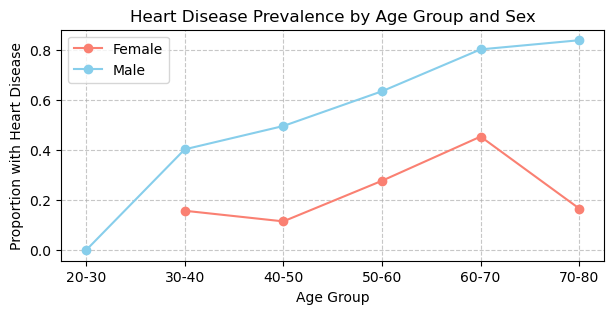

In [176]:
age_sex_trend = df.groupby(['AgeGroup', 'Sex'], observed=True)['HeartDisease'].mean().unstack()
print(age_sex_trend)

# Plot with matplotlib
plt.figure(figsize=(7, 3))
plt.plot(age_sex_trend.index, age_sex_trend['F'], marker='o', label='Female', color='salmon')
plt.plot(age_sex_trend.index, age_sex_trend['M'], marker='o', label='Male', color='skyblue')
plt.title('Heart Disease Prevalence by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Heart Disease')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Prediction Model

In [222]:
#Predict HeartDisease with two approaches - NumPy (DIY) and scikit-learn (Standard)
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [234]:
# 4.1: Data Preparation
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Features (X) and target (y) for scikit-learn
X = df_encoded.drop(columns=['HeartDisease', 'AgeGroup'])  
y = df_encoded['HeartDisease']  

# Split into train and test sets, preserving indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X to NumPy for scikit-learn later, but keep indices
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()


print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X shape: (918, 15)
X_train shape: (734, 15)
X_test shape: (184, 15)


### Option 1: NumPy (DIY)

In [236]:
#Predict HeartDisease = 1 if Age > 50 AND Cholesterol > 200
def simple_rule_prediction(df_subset):
    predictions = np.where((df_subset['Age'] > 50) & (df_subset['Cholesterol'] > 200), 1, 0)
    return predictions

# Align with train/test split using pandas indices
train_df = df.loc[X_train.index]  
test_df = df.loc[X_test.index]    

y_pred_rule_train = simple_rule_prediction(train_df)
y_pred_rule_test = simple_rule_prediction(test_df)

# Accuracy
accuracy_rule = np.mean(y_pred_rule_test == y_test)
print("\nSimple Rule-Based Model Accuracy")
print(f"Accuracy: {accuracy_rule:.2f}")


Simple Rule-Based Model Accuracy
Accuracy: 0.53


### Option 2: Scikit-learn

In [238]:
#Logistic Regression with Scikit-learn
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_np, y_train)  
y_pred_sklearn = model.predict(X_test_np)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("\nScikit-learn Model Accuracy")
print(f"Accuracy: {accuracy_sklearn:.2f}")


Scikit-learn Model Accuracy
Accuracy: 0.85


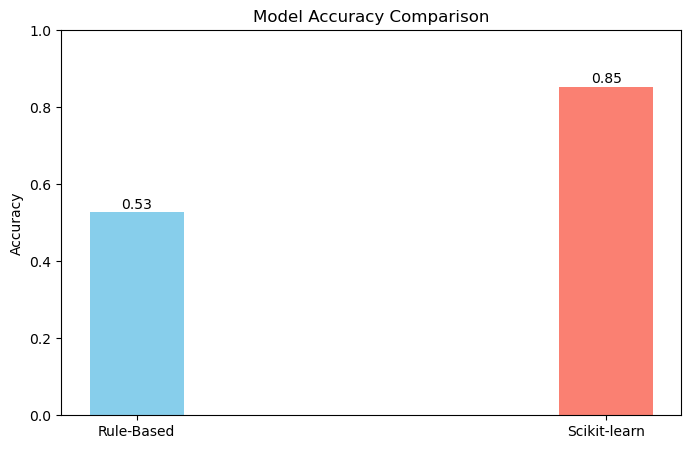

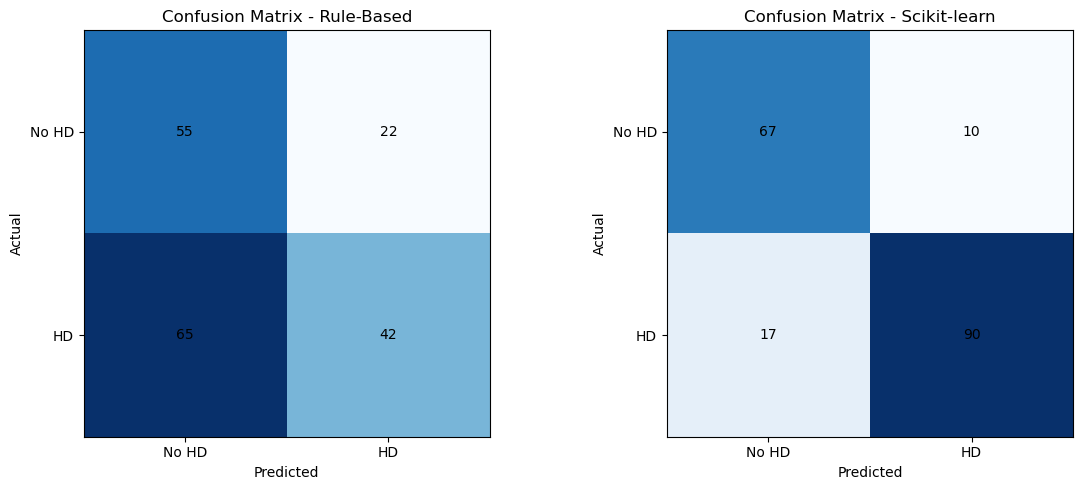

In [242]:
#Visualize Results
#Bar Plot of Accuracies
plt.figure(figsize=(8, 5))
plt.bar(['Rule-Based', 'Scikit-learn'], [accuracy_rule, accuracy_sklearn], color=['skyblue', 'salmon'],width=0.2)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([accuracy_rule, accuracy_sklearn]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

#Confusion Matrices
cm_rule = confusion_matrix(y_test, y_pred_rule_test)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(cm_rule, cmap='Blues')
ax1.set_title('Confusion Matrix - Rule-Based')
ax1.set_xticks([0, 1], ['No HD', 'HD'])
ax1.set_yticks([0, 1], ['No HD', 'HD'])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
for i in range(2):
    for j in range(2):
        ax1.text(j, i, cm_rule[i, j], ha='center', va='center', color='black')

ax2.imshow(cm_sklearn, cmap='Blues')
ax2.set_title('Confusion Matrix - Scikit-learn')
ax2.set_xticks([0, 1], ['No HD', 'HD'])
ax2.set_yticks([0, 1], ['No HD', 'HD'])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
for i in range(2):
    for j in range(2):
        ax2.text(j, i, cm_sklearn[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

# THE END